<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/NLPReviewsData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [2]:
data=pd.read_excel('/content/drive/MyDrive/Canva_reviews.xlsx')

In [3]:
data.shape

(1500, 13)

In [4]:
data.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [5]:
data.loc[13,'review']

'Unable to save my work. Nothing works :('

In [6]:
data.loc[13,'Sentiment']

'Negative'

In [7]:
data.loc[1495,'review']

'Absolutely amazing and a lifesaver for teachers.'

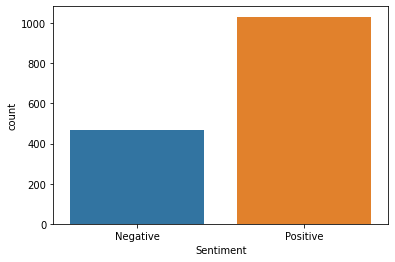

In [8]:
sns.countplot(x='Sentiment',data=data)

In [9]:
data["Sentiment"].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

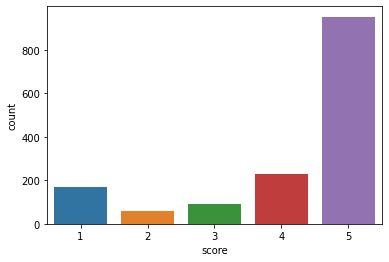

In [10]:
#ratings
sns.countplot(x="score",data=data)

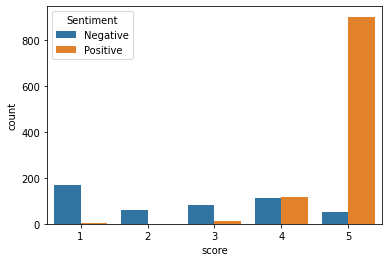

In [11]:
#Relationship between score and sentiment
sns.countplot(x='score',data=data,hue='Sentiment')
plt.show()

In [12]:
#lengh of review versus sentiment
data['len']=data['review'].apply(len)
data['len'].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: len, dtype: float64

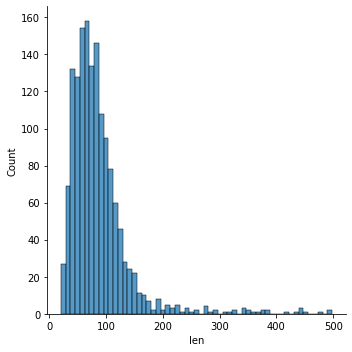

In [13]:
sns.displot(data['len'])
plt.show()

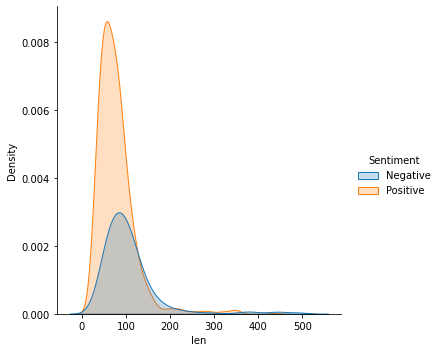

In [14]:
sns.displot(data=data,x='len',hue='Sentiment',kind='kde', fill=True)
plt.show()

In [15]:
#Data pre-processing
#NLTK
#Tokenization
data = data[["review", "Sentiment"]]

In [16]:
data.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
sent_tokenize(data.loc[13,"review"])

['Unable to save my work.', 'Nothing works :(']

In [19]:
sent_tokenize(data.loc[1495, "review"])

['Absolutely amazing and a lifesaver for teachers.']

In [20]:
word_tokenize(data.loc[13, "review"])

['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '(']

In [21]:
word_tokenize(data.loc[1495, "review"])

['Absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.']

In [22]:
#Convert to lower case
reviews=list(data['review'])

In [23]:
len(reviews)

1500

In [24]:
reviews_lower = []
for r in reviews:
    reviews_lower.append(r.lower())

In [25]:
tokens=[word_tokenize(i) for i in reviews_lower]

In [26]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

In [27]:
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
tokens = [[word for word in t if word not in sw] for t in tokens]

#Remove Punctuation

In [30]:
tokenizer = RegexpTokenizer(r'\w+')

In [31]:
tokenizer.tokenize("wasn't")

['wasn', 't']

In [32]:
t = tokenizer.tokenize("wasn't")

In [33]:
"".join(t)

'wasnt'

In [34]:
tokens[13]

['unable', 'save', 'work', '.', 'nothing', 'works', ':', '(']

In [35]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
           if len(tokenizer.tokenize(word))>0] for t in tokens]

In [36]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

#Stemming

In [37]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [38]:
porter.stem("teachers")

'teacher'

In [39]:
lancaster.stem("teachers")

'teach'

In [40]:
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [41]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

#Word Count Distribution

In [42]:
flat_tokens = [word for t in tokens for word in t]

In [43]:
len(flat_tokens)

13782

In [44]:
counts = Counter(flat_tokens)

In [45]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]